In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

In [2]:
X,y,c = make_blobs(500,cluster_std=0.8,centers=4, n_features=2, return_centers=True)

In [5]:
print(c)

[[ 6.39378832 -4.49117068]
 [-3.90354018 -5.32457354]
 [ 0.35365407  8.89997145]
 [ 7.69049056  8.29116293]]


In [9]:
df_blobs = pd.DataFrame(
    {   
    'x1':X[:,0],
    'x2':X[:,1],
    'y':y,
    }
)

In [10]:
df_blobs

,x1,x2,y
0,-4.214906,-4.376257,1
1,7.557089,-5.431675,0
2,4.816040,-4.695360,0
3,-3.227689,-4.625916,1
4,4.790645,-3.915903,0
...,...,...,...
495,5.719397,-3.697944,0
496,-4.319501,-4.072499,1
497,9.451583,9.283908,3
498,0.329503,8.357174,2


In [14]:
df_centers = pd.DataFrame(
    {
     'x1':c[:,0],
     'x2':c[:,1],
    }
)

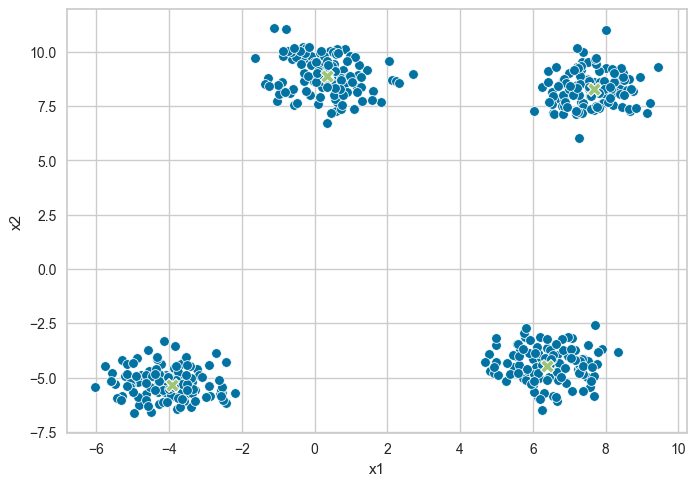

In [17]:
sns.scatterplot(data=df_blobs,x='x1', y='x2')
sns.scatterplot(data=df_centers,x='x1', y='x2', marker='X', s=100)
plt.show()

In [24]:
kmeans = KMeans(n_clusters=4)
df_clusters = kmeans.fit_predict(X)
df_blobs['cluster_predict'] = df_clusters
kmeans_centers =kmeans.cluster_centers_
df_kmeans_center = pd.DataFrame(
    {
        'x1': kmeans_centers[:,0],
        'x2': kmeans_centers[:,1],
    }
)

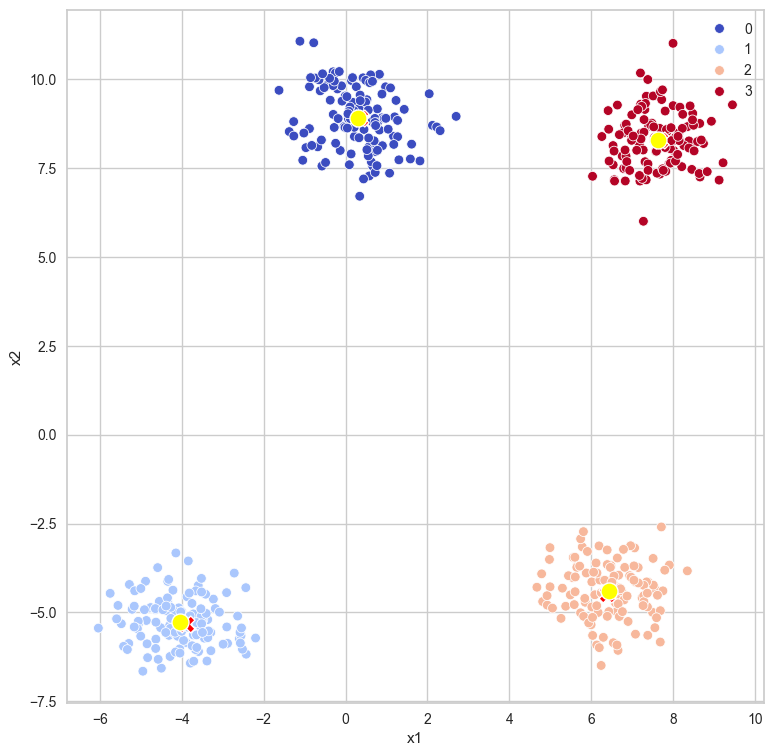

In [25]:
fig=plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,x='x1',y='x2', hue='cluster_predict', palette='coolwarm')
sns.scatterplot(data=df_centers,x='x1', y='x2', marker='X', s=150, color='red')
sns.scatterplot(data=df_kmeans_center,x='x1', y='x2', marker='o', s=150, color='yellow')
plt.show()

In [27]:
def visualizacion_de_Cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_clusters = kmeans.fit_predict(X)
    df_blobs['cluster_predict'] = df_clusters
    kmeans_centers =kmeans.cluster_centers_
    df_kmeans_center = pd.DataFrame(
        {
            'x1': kmeans_centers[:,0],
            'x2': kmeans_centers[:,1],
        }
    )

    fig=plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,x='x1',y='x2', hue='cluster_predict', palette='coolwarm')
    sns.scatterplot(data=df_centers,x='x1', y='x2', marker='X', s=150, color='red')
    sns.scatterplot(data=df_kmeans_center,x='x1', y='x2', marker='o', s=150, color='yellow')
    plt.show()

3


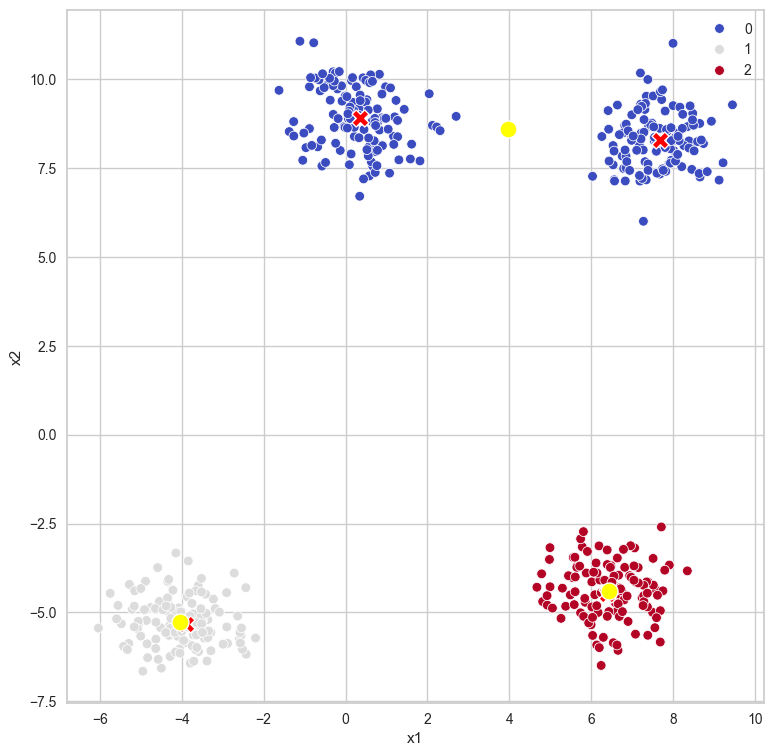

4


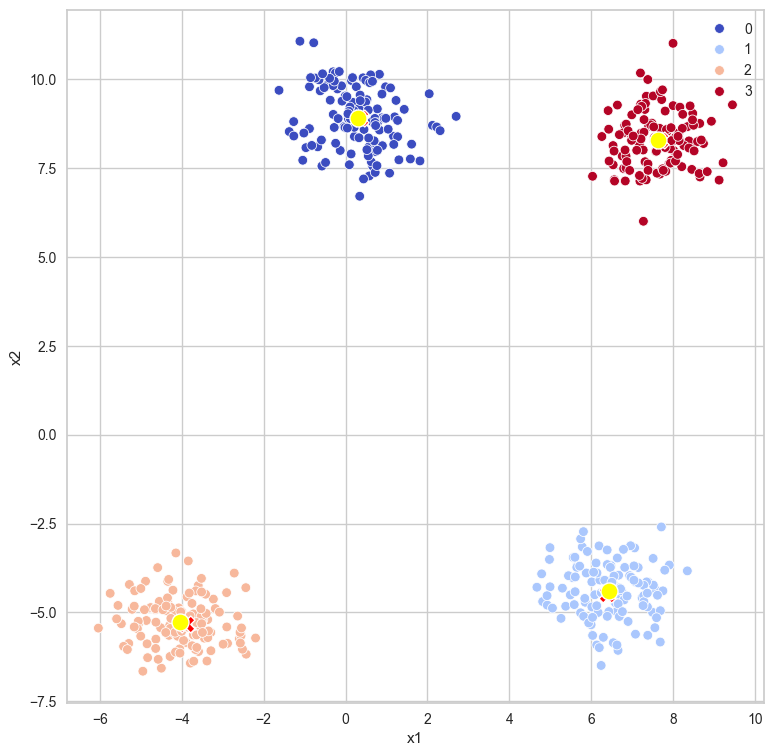

5


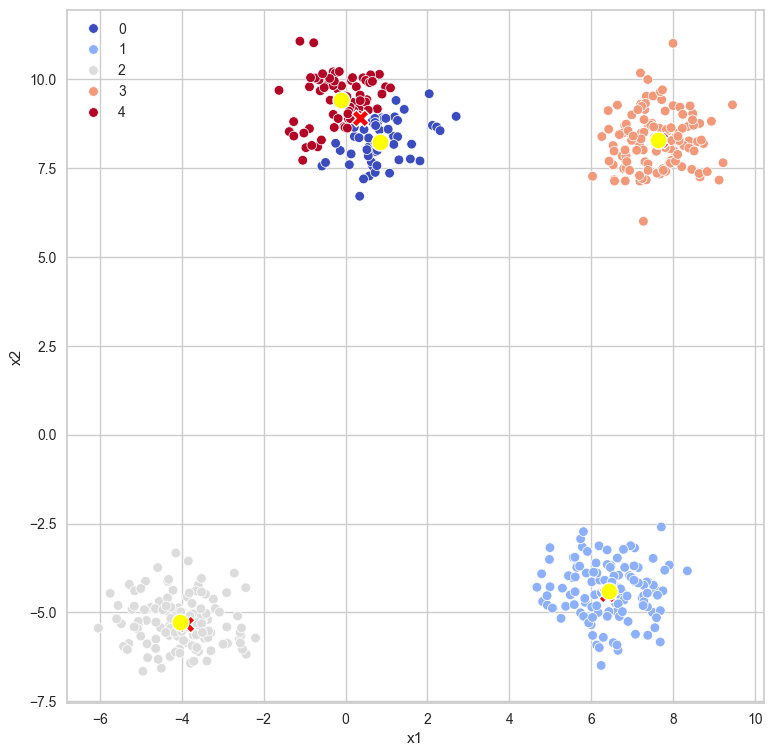

6


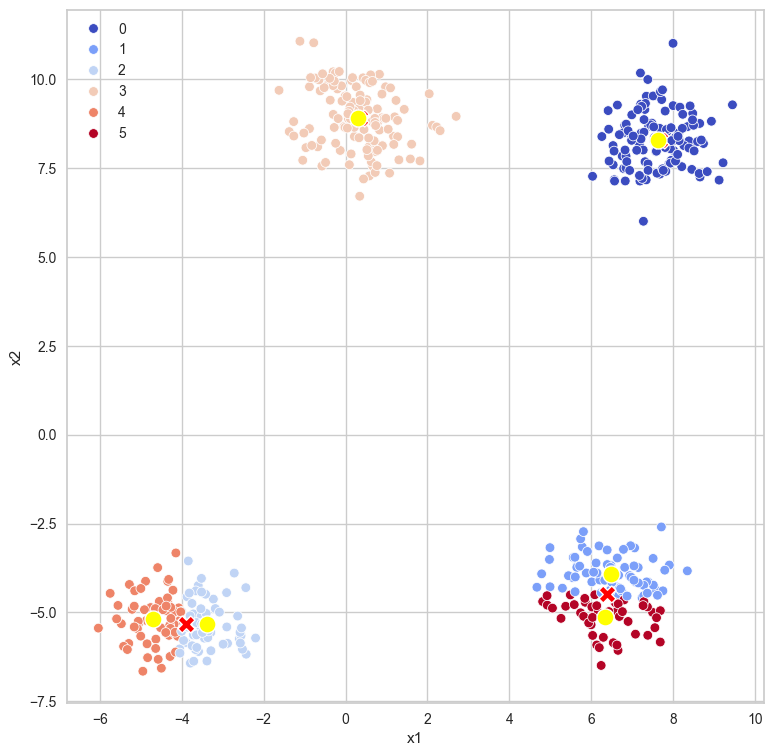

7


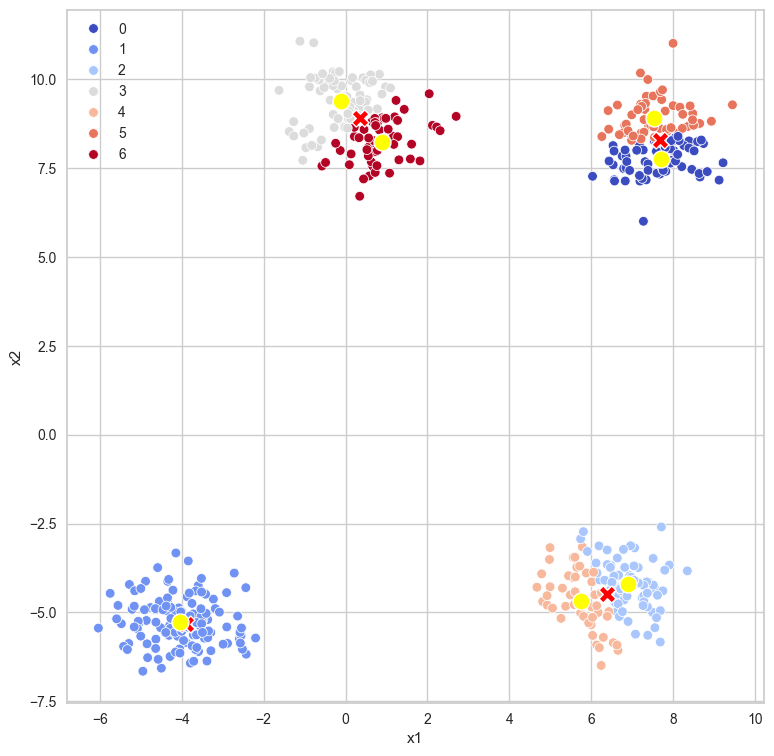

In [29]:
for _ in range(3,8):
    print(_)
    visualizacion_de_Cluster(_)

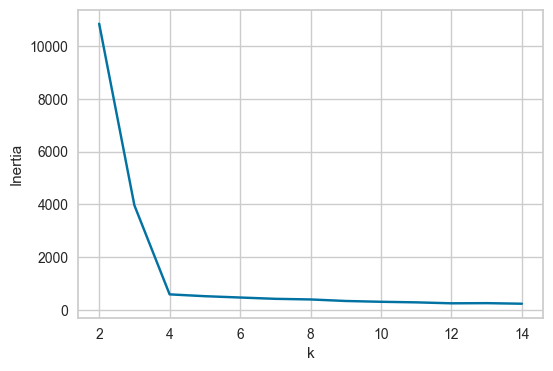

In [38]:
sum_of_squared_distance = []
K= range(2,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    sum_of_squared_distance.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K,sum_of_squared_distance,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()



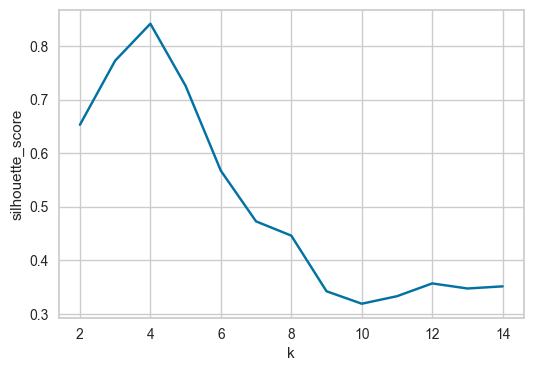

In [39]:
silhouete_scores = []
K= range(2,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    y = km.predict(X)
    silhouete_scores.append(silhouette_score(X,y))

plt.figure(figsize=(6,4))
plt.plot(K,silhouete_scores,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()


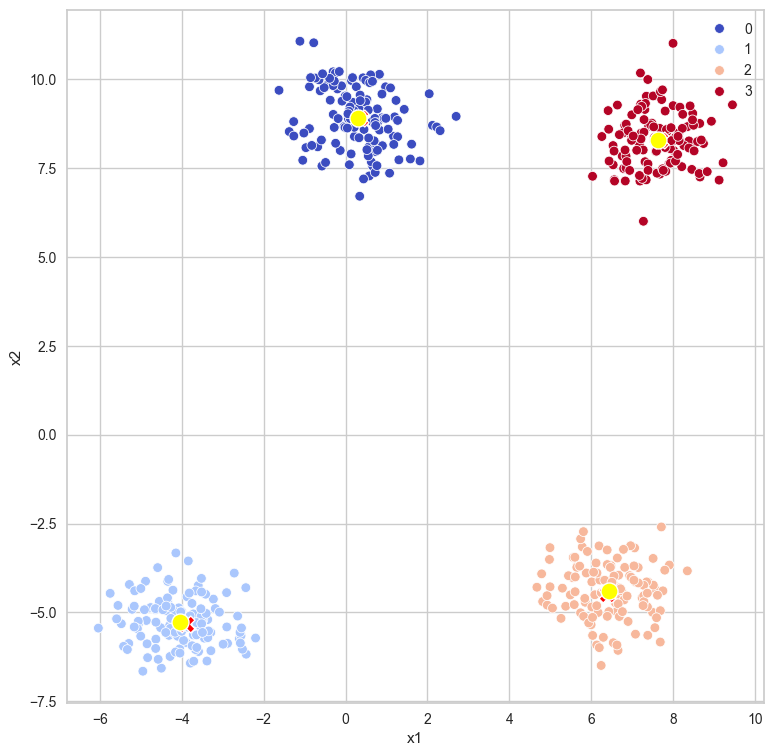

In [40]:
visualizacion_de_Cluster(4)

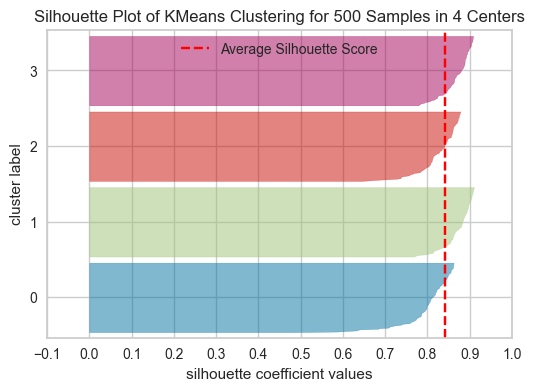

In [50]:
plt.figure(figsize=(6,4))
km = KMeans(n_clusters=4) 
visualizer = silhouette_visualizer(km,X,colors='yellowbrick')


